# Analizador de grupos de Whatsapp

## Instalando bibliotecas necessárias

In [ ]:
!pip install emoji

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=d9214766bbeedd006764c3a39534b2e41848b1f8b5e410b51c78ede4e508b94e
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
!pip install pandas-profiling==2.9.0

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 3.1MB 8.7MB/s 
     |████████████████████████████████| 604kB 29.8MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 296kB 34.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=f01cb668ae6e8933a543164af212e0be396d58bb19aedbccdc4560b072b8fd03
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=885f3b5992fdc5163b6a525faf169515d04d082578063ddb145daae470f230df
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

## Importando bibliotecas


In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
import pandas_profiling

## Preparação do Dataset

Função que analisa se a string inicia conforme expressão regular.

In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)([2][0][0-2][0-9]+) ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'chat_whatsapp_anonymate.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['date', 'time', 'author', 'message']) # Initialising a pandas Dataframe.
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,time,author,message
0,2020-05-18,21:58,User120,Kkjjjjjjj
1,2020-05-18,21:58,User613,<Arquivo de mídia oculto>
2,2020-05-18,21:58,User120,<Arquivo de mídia oculto>
3,2020-05-18,21:58,User613,Aquele de cr7 foi o gol mais bonito do campeonato
4,2020-05-18,21:58,User120,"A alavanca tremendo, aí fica difícil fazer"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     39996 non-null  datetime64[ns]
 1   time     39996 non-null  object        
 2   author   39634 non-null  object        
 3   message  39996 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.author.unique()

array(['User120', 'User613', 'User180', 'User109', 'User590', 'User938',
       'User519', 'User273', 'User702', 'User420', 'User569', None,
       'User213', 'User450', 'User662', 'User325'], dtype=object)

Como podemos perceber, algumas messagens ficaram com o autor 'None'. Vamos tentar ver o porquê disso.

In [ ]:
df.loc[df.author.isnull()]

,date,time,author,message
125,2020-05-18,23:41,None,Você mudou a descrição do grupo
133,2020-05-19,11:35,None,User109: Meus palpites: 1) Campeão: Vidal 2) ...
157,2020-05-19,12:53,None,User519: Posso jogar hoje depois das 17:30 ate...
177,2020-05-19,13:06,None,User569: Acho que dá pra irmos 18:30
206,2020-05-19,15:05,None,"User273: Depois da Pandemia, se você tivesse 2..."
...,...,...,...,...
38983,2020-10-19,10:05,None,"User613: Barcelona: fumo! Real: top! Kroos, C..."
39143,2020-10-21,15:19,None,User120: Só digo uma coisa: TENHAM MEDO!!
39172,2020-10-21,19:33,None,User120: https://copafacil.com/1-campeonato-ga...
39246,2020-10-22,06:35,None,"User569: Eu mentalizei: gaúcho, Beckham, Van b..."


Por algum motivo, alguns usuários não foram identificados, e acabaram ficando como None, mesmo seguindo o mesmo padrão.

Porém existe os casos que as mensagens são mensagens administrativas do tipo: 'O administrador mudou a descrição do grupo.' ou 'Alguém foi removido', essas mensagens serão removidas após corrigirmos o problema dos usuários que estão em mensagens.

Observando o nome dos usuários percebemos um padrão, todos começam com a string 'User' seguido de 3 algarismos. Dessa forma podemos fazer uma expressão regular.

In [ ]:
pattern_user = re.compile('^User[0-9]{3}:')

Vamos fazer uma cópia do dataframe original, para evitar de perdermos informações originais.

In [ ]:
chat = df.copy()

Criamos duas funções para tratarmos o problema:
- 1ª Função que retorna o nome caso encontre no texto algum regex criado. Observe que pegamos até o penúltimo elemento da string([:-1]), justamente para não pegarmos o ":".
- 2ª Função que retorna o texto excluindo o nome do usuário.

In [ ]:
def resolveName(text):
  if (pattern_user.search(text)):
    user = pattern_user.search(text).group(0)[:-1]
    return user

def resolveMessage(text):
  if (pattern_user.search(text)):
    user = pattern_user.search(text).group(0)
    text = text.replace(user, '')
    return text
  return text

In [ ]:
chat.loc[chat['author'].isnull(), 'author'] = chat.loc[chat['author'].isnull(), 'message'].map(resolveName)
chat.message = chat.message.apply(resolveMessage)

Verificamos agora que as únicas mensagens sem 'author', são justamente as mensagens de controle do próprio Whatsapp. Devemos então apagar essas linhas.

In [ ]:
chat.loc[chat['author'].isnull()]

,date,time,author,message
125,2020-05-18,23:41,None,Você mudou a descrição do grupo
3098,2020-05-26,19:28,None,‎User613 mudou a descrição do grupo
3561,2020-05-28,09:42,None,‎User180 saiu
3797,2020-05-28,13:37,None,Você adicionou User180
4020,2020-05-29,11:31,None,Você adicionou Isac PES
4047,2020-05-29,11:39,None,Você mudou a descrição do grupo
4344,2020-05-29,17:58,None,‎User662 mudou a descrição do grupo
4417,2020-05-29,19:14,None,‎User613 mudou a descrição do grupo
6905,2020-04-06,17:20,None,Você adicionou Wagner PES
7965,2020-06-06,22:41,None,‎User109 adicionou User613


In [ ]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     39996 non-null  datetime64[ns]
 1   time     39996 non-null  object        
 2   author   39967 non-null  object        
 3   message  39996 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


In [ ]:
chat = chat.dropna()
chat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39967 entries, 0 to 39995
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     39967 non-null  datetime64[ns]
 1   time     39967 non-null  object        
 2   author   39967 non-null  object        
 3   message  39967 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


In [ ]:
chat.author.unique()

array(['User120', 'User613', 'User180', 'User109', 'User590', 'User938',
       'User519', 'User273', 'User702', 'User420', 'User569', 'User213',
       'User450', 'User662', 'User325'], dtype=object)

# Estatísticas


In [ ]:
pandas_profiling.ProfileReport(chat)

In [ ]:
total_messages = chat.shape[0]
print(total_messages)

39967


In [ ]:
media_messages = chat.loc[chat['message']=='<Arquivo de mídia oculto>'].shape[0]
print(media_messages)

5257


In [ ]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

chat["emoji"] = chat["message"].apply(split_count)

In [ ]:
emojis = sum(chat['emoji'].str.len())
print(emojis)

3486


In [ ]:
URLPATTERN = r'(https?://\S+)'
chat['urlcount'] = chat.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
links = np.sum(chat.urlcount)

In [ ]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 39967
Media: 5257
Emojis: 3486
Links: 148


In [ ]:
chat_media_messages = chat[chat['message'] == '<Arquivo de mídia oculto>']

In [ ]:
chat_media_messages.head()

,date,time,author,message,emoji,urlcount
1,2020-05-18,21:58,User613,<Arquivo de mídia oculto>,[],0
2,2020-05-18,21:58,User120,<Arquivo de mídia oculto>,[],0
11,2020-05-18,22:08,User120,<Arquivo de mídia oculto>,[],0
12,2020-05-18,22:08,User109,<Arquivo de mídia oculto>,[],0
17,2020-05-18,22:09,User109,<Arquivo de mídia oculto>,[],0


In [ ]:
chat_messages = chat.drop(chat_media_messages.index)

In [ ]:
chat_messages.head()

,date,time,author,message,emoji,urlcount
0,2020-05-18,21:58,User120,Kkjjjjjjj,[],0
3,2020-05-18,21:58,User613,Aquele de cr7 foi o gol mais bonito do campeonato,[],0
4,2020-05-18,21:58,User120,"A alavanca tremendo, aí fica difícil fazer",[],0
5,2020-05-18,21:58,User120,Kkkkkkkkkkkkkkkkk,[],0
6,2020-05-18,21:59,User613,Tds eu fui na bola(os q vc perdeu)... mas vale...,[],0


In [ ]:
chat_messages['letter_count'] = chat_messages['message'].apply(lambda s : len(s))
chat_messages['word_count'] = chat_messages['message'].apply(lambda s : len(s.split(' ')))
chat_messages["message_count"]=1

In [ ]:
chat_messages["emojicount"]= chat['emoji'].str.len()

In [ ]:
chat_messages.head()

,date,time,author,message,emoji,urlcount,letter_count,word_count,message_count,emojicount
0,2020-05-18,21:58,User120,Kkjjjjjjj,[],0,9,1,1,0
3,2020-05-18,21:58,User613,Aquele de cr7 foi o gol mais bonito do campeonato,[],0,49,10,1,0
4,2020-05-18,21:58,User120,"A alavanca tremendo, aí fica difícil fazer",[],0,42,7,1,0
5,2020-05-18,21:58,User120,Kkkkkkkkkkkkkkkkk,[],0,17,1,1,0
6,2020-05-18,21:59,User613,Tds eu fui na bola(os q vc perdeu)... mas vale...,[],0,60,13,1,0


## Estatística por usuário

In [ ]:
# Criando lista de usuários único pela função unique()
l = chat_messages.author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= chat_messages[chat_messages["author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #word_count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['word_count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = chat_media_messages[chat_media_messages['author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of User120 -
Messages Sent 5190
Words per message 4.48709055876686
Media Messages Sent 972
Emojis Sent 395
Links Sent 38

Stats of User613 -
Messages Sent 7133
Words per message 5.398429833169774
Media Messages Sent 1253
Emojis Sent 623
Links Sent 27

Stats of User180 -
Messages Sent 3724
Words per message 4.537593984962406
Media Messages Sent 288
Emojis Sent 79
Links Sent 3

Stats of User109 -
Messages Sent 7912
Words per message 4.780333670374115
Media Messages Sent 1371
Emojis Sent 325
Links Sent 17

Stats of User590 -
Messages Sent 1014
Words per message 9.222879684418146
Media Messages Sent 34
Emojis Sent 102
Links Sent 10

Stats of User938 -
Messages Sent 980
Words per message 9.043877551020408
Media Messages Sent 142
Emojis Sent 764
Links Sent 6

Stats of User519 -
Messages Sent 881
Words per message 6.540295119182747
Media Messages Sent 158
Emojis Sent 428
Links Sent 14

Stats of User273 -
Messages Sent 1049
Words per message 4.933269780743565
Media Messages Sent 227
Emoj

## Emoji mais utilizado no grupo

In [ ]:
total_emojis_list = list(set([a for b in chat_messages.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

129


In [ ]:
total_emojis_list = list([a for b in chat_messages.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 894), ('🤣', 883), ('👏🏻', 293), ('‼️', 198), ('✅', 110), ('👏', 105), ('😍', 91), ('😳', 63), ('👀', 61), ('👍🏻', 53), ('😬', 48), ('😭', 45), ('🤔', 40), ('👏🏼', 38), ('🚨', 37), ('🔝', 36), ('😅', 33), ('😔', 31), ('🙏🏻', 30), ('🛑', 24), ('😡', 17), ('\U0001f970', 14), ('🙌🏾', 14), ('😩', 13), ('🔥', 12), ('😪', 12), ('😕', 12), ('😓', 10), ('😱', 10), ('😢', 9), ('😘', 9), ('🙌🏻', 8), ('\U0001f91f🏻', 8), ('😎', 7), ('\U0001f97a', 7), ('🖕🏼', 6), ('⚠️', 6), ('🔦', 6), ('🍐', 6), ('😉', 5), ('👊🏻', 5), ('😀', 5), ('🤙', 5), ('🍺', 5), ('👏🏽', 5), ('🏆', 5), ('😞', 5), ('👆🏻', 5), ('🚔', 5), ('😒', 4), ('🖕', 4), ('😊', 4), ('🙌', 4), ('💔', 4), ('🐢', 4), ('🔨', 3), ('🦁', 3), ('😄', 3), ('❌', 3), ('\U0001f928', 3), ('🤗', 3), ('🎼', 3), ('❤️', 3), ('🎡', 3), ('🐸', 3), ('😁', 2), ('🤐', 2), ('🙋🏽\u200d♂️', 2), ('☝️', 2), ('🖕🏻', 2), ('👍🏾', 2), ('🐱', 2), ('🚲', 2), ('😃', 2), ('🤦\u200d♂️', 2), ('🎨', 2), ('👨\u200d💼', 2), ('🦅', 2), ('😫', 2), ('🤷\u200d♂️', 2), ('\U0001f9d0', 2), ('🤦🏽\u200d♂️', 2), ('🚴', 2), ('👍🏼', 2), ('👎', 1), ('💳', 1), 

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,894
1,🤣,883
2,👏🏻,293
3,‼️,198
4,✅,110
...,...,...
124,🔼,1
125,👇🏻,1
126,🎩,1
127,🤓,1


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Distribuição de conversas por dia

In [ ]:
def f(i):
  l = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
  return l[i];
day_df=pd.DataFrame(chat_messages["message"])
day_df['day_of_date'] = chat_messages['date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [ ]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

## Número de mensagens por data

In [ ]:
date_df = chat_messages.groupby("date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="date", y="message_count")
fig.update_xaxes(nticks=20)
fig.show()

In [ ]:
date_df["rolling"] = date_df["message_count"].rolling(14).mean()
fig = px.line(date_df, x="date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()

## Quem mais conversa?

In [ ]:
auth = chat_messages.groupby("author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="author", x="message_count", color='author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta", "purple",
                                      "black", "salmon", "orange", "yellow", "pink", "brown",
                                      "darkblue", "CadetBlue", "Chartreuse"],
             title="Sequencia de cor por usuário"
            )

fig.show()

## Horário de pico

Text(0, 0.5, 'Hora')

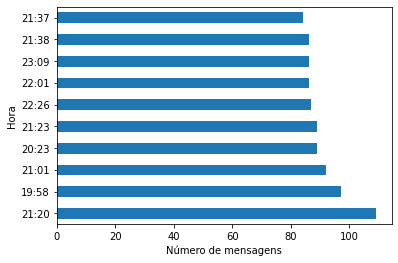

In [ ]:
chat_messages['time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Número de mensagens')
plt.ylabel('Hora')

## O dia mais relevante

2020-09-15    857
2020-06-18    792
2020-05-28    618
2020-06-14    614
2020-11-06    577
             ... 
2020-04-09     17
2020-03-10     10
2020-08-09      6
2020-07-29      4
2020-08-28      2
Name: date, Length: 159, dtype: int64


Text(0, 0.5, 'Data')

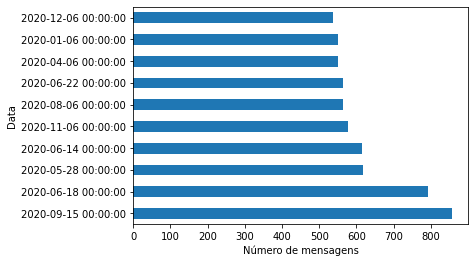

In [ ]:
chat_messages['date'].value_counts().head(10).plot.barh()
print(chat_messages['date'].value_counts())
plt.xlabel('Número de mensagens')
plt.ylabel('Data')

Existem 972047 palavras em todo o chat.


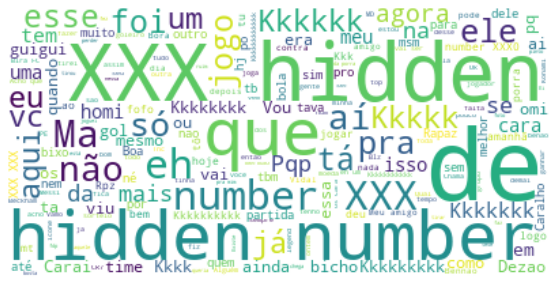

In [ ]:
text = " ".join(review for review in chat_messages.message)
print ("Existem {} palavras em todo o chat.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def excludeWords(text):
  words_set = {'hidden', 'XXX', 'number'}
  return ' '.join('' if i in words_set else i for i in text.split())

In [ ]:
chat_without_some_words = chat_messages.copy()

In [ ]:
chat_without_some_words.message = chat_without_some_words.message.map(excludeWords)

Existem 970120 palavras em todo o chat.


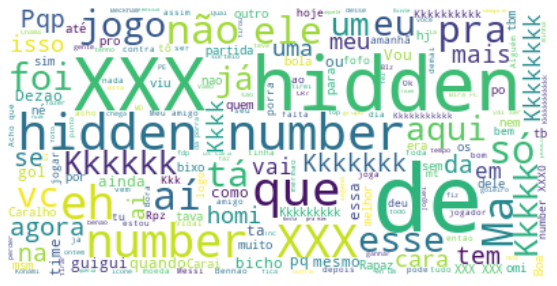

In [ ]:
text = " ".join(review for review in chat_without_some_words.message)
print ("Existem {} palavras em todo o chat.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()